To analyze Photon Statistics using the Second-Order Coherence Function, $g^{(2)}(0)$.

--- Photon Statistics Results ---
Fock State (|1>):    g(2) = 0.0000  (Quantum/Antibunched)
Coherent State:      g(2) = 1.0000  (Random/Poissonian)
Thermal State:       g(2) = 1.9945  (Chaotic/Bunced)


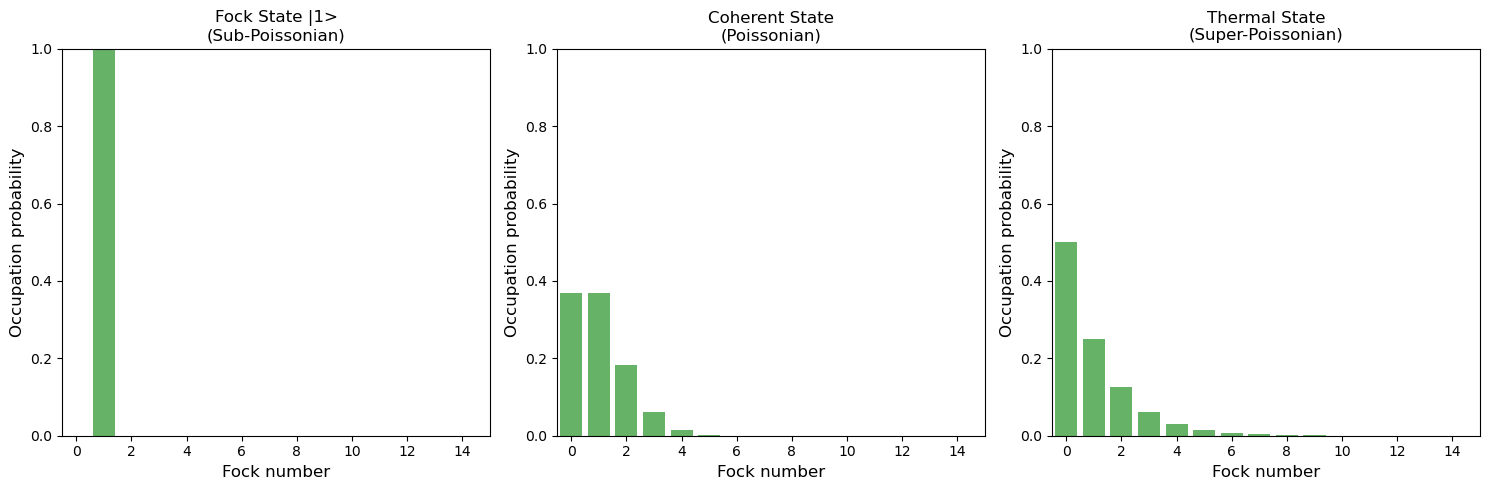

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def calculate_g2(state, a):
    # Numerator: Expectation of pair detection
    G2 = expect(a.dag() * a.dag() * a * a, state)
    
    # Denominator: (Mean photon number)^2
    n_avg = expect(a.dag() * a, state)
    
    if n_avg == 0: return 0 # Avoid division by zero
    return G2 / (n_avg**2)

# --- Parameters ---
N = 15
a = destroy(N)

# --- 1. Define the States ---
# A. Fock State |1> (Your JC Result)
psi_fock = basis(N, 1)

# B. Thermal State (Chaotic Light)
# Matches average energy: mean photon number = 1
rho_thermal = thermal_dm(N, 1) 

# C. Coherent State (Laser)
# Matches average energy: mean photon number = 1
psi_coherent = coherent(N, np.sqrt(1))

# --- 2. Calculate g(2)(0) ---
g2_fock = calculate_g2(psi_fock, a)
g2_thermal = calculate_g2(rho_thermal, a)
g2_coherent = calculate_g2(psi_coherent, a)

print(f"--- Photon Statistics Results ---")
print(f"Fock State (|1>):    g(2) = {g2_fock:.4f}  (Quantum/Antibunched)")
print(f"Coherent State:      g(2) = {g2_coherent:.4f}  (Random/Poissonian)")
print(f"Thermal State:       g(2) = {g2_thermal:.4f}  (Chaotic/Bunced)")

# --- 3. Visualization ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Fock
plot_fock_distribution(psi_fock, fig=fig, ax=axes[0])
axes[0].set_title("Fock State |1>\n(Sub-Poissonian)")

# Plot Coherent
plot_fock_distribution(psi_coherent, fig=fig, ax=axes[1])
axes[1].set_title("Coherent State\n(Poissonian)")

# Plot Thermal
plot_fock_distribution(rho_thermal, fig=fig, ax=axes[2])
axes[2].set_title("Thermal State\n(Super-Poissonian)")

plt.tight_layout()
plt.show()